## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri
### https://lnastri25.github.io/projects/

# Olist

Gran parte de nuestra tarea es crear "Features", variables en los datos que representan un aspecto del fenómeno que estudiamos y nos ayudan a explicarlo.


### **Ejercicio**

Vamos a investigar la relación entre orders y el score.

La idea es crear un dataframe con las siguientes features:

| feature_name 	                | type 	| description 	                                                                                                                                         |
|:------------------------------|:---:	|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| `order_id` 	                  | str 	| the id of the order 	                                                                                                                                 |
| `tiempo_de_espera` 	          | float 	| numero de días entre order_date y delivered_date 	                                                                                                    |
| `tiempo_de_espera_previsto` 	 | float 	| numero de días entre order_date y estimated_delivery_date 	                                                                                           |
| `real_vas_esperado` 	         | float 	| si la fecha de entrega real es posterior a la fecha de entrega estimada, devuelve el número de días entre las dos fechas; de lo contrario, devuelve 0 |
| `order_status` 	              | str 	| statusde la orden	                                                                                                                                    |
| `es_cinco_estrellas` 	        | int 	| 1 si tuvo cinco estrellas en la  review, 0 caso contrario 	                                                                                           |
| `es_una_estrella` 	           | int 	| 1 si tuvo una estrella, 0 caso contrario 	                                                                                                            |
| `review_score` 	              | int 	| from 1 to 5 	                                                                                                                                         |
| `numero_de_productos` 	       | int 	| numero de productos que contiene una orden	                                                                                                           |
| `numero_de_vendedores` 	      | int 	| numero de vendedores unicos                                                                                                                           |
| `precio` 	                    | float 	| total del precio pagado por el cliente                                                                                                                |
| `valor_transporte` 	          | float 	| el valor del freight pagado por el cliente 	                                                                                                          |
| `distancia_al_cliente` 	      | float 	| distancia en km entre cliente y vendedor 	                                                                                                  |
  
Queremos filtrar las ordenes no entregadas

**Metodología:**

Vamos a crear dos notebooks una de testeo y otra para importar nuestro paquete `preprocess.orders_data` y de ahí ir elavorando los métodos.

1er Método: Load_data: Trae el dataset sin nulos de una ubicación ya prefijada.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Import orders data
from functions.load_data import load_all_data
data = load_all_data("data")

In [47]:
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'primary_table', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [48]:
orders = data['orders'].copy()

## 1. Crear orders.py

**a) `tiempo_de_espera`**

Vamos a crear un dataframe que contenga las siguientes columnas: `order_id`, `tiempo_de_espera`, `tiempo_de_espera_previsto`, `real_vs_esperado` y `status_de_la_orden`.

In [49]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [50]:
orders.dtypes

order_id                             object
customer_id                          object
order_status                         object
order_purchase_timestamp             object
order_approved_at                    object
order_delivered_carrier_date         object
order_delivered_customer_date        object
order_estimated_delivery_date        object
dtype: object

In [51]:
orders.columns

Index(['order_id                         ',
       'customer_id                      ', 'order_status ',
       'order_purchase_timestamp ', 'order_approved_at ',
       'order_delivered_carrier_date ', 'order_delivered_customer_date ',
       'order_estimated_delivery_date'],
      dtype='object')

Me di cuenta que las columnas tienen espacios en blanco, por lo que importo la función de eliminación de espacios en blanco del archivo preprocess.py.


In [52]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

In [53]:
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Filtro los datos por pedidos entregados ya que estamos interesados en el tiempo de espera. Los pedidos que aún no se han entregado no tienen un tiempo de espera.

In [54]:
ordenes_entregadas = orders[orders['order_status'] == 'delivered']
ordenes_entregadas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Transformo columnas a DateTime

In [55]:
from functions.preprocess import transformar_columnas_datetime 
ordenes_entregadas = transformar_columnas_datetime(ordenes_entregadas)

In [56]:
ordenes_entregadas.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Tiempo delta entre order y delivered date
##### Acabo de calcular el número de días en cada tiempo_delta

In [57]:
from functions.preprocess import calcular_time_delta
fecha_inicio = "order_purchase_timestamp"
fecha_fin = "order_delivered_customer_date"
ordenes_entregadas = calcular_time_delta(ordenes_entregadas, fecha_inicio, fecha_fin)
ordenes_entregadas.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


## Calculo de Tiempo de espera real

In [58]:
from functions.preprocess import tiempo_de_espera_real
ordenes_entregadas = tiempo_de_espera_real(ordenes_entregadas,is_delivered=False)
ordenes_entregadas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877


## Calculo de Tiempo de espera previsto

In [59]:
from functions.preprocess import tiempo_de_espera_esperado
ordenes_entregadas = tiempo_de_espera_esperado(ordenes_entregadas,is_delivered=False)
ordenes_entregadas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049


In [60]:
ordenes_entregadas[ordenes_entregadas["tiempo_de_espera"] - ordenes_entregadas["tiempo_de_espera_pronosticado"] > 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,21.0,21.327963,9.394792
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,28.0,28.928484,19.009109
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,30.0,30.374757,30.333495
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33.0,33.896933,26.105694
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,24.0,24.943414,23.381771
...,...,...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,18.0,18.053148,13.050764
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,22.0,22.924213,19.091007
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,39.0,39.842222,18.129039
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,20.0,20.209178,18.175486


## Calculo de Tiempo Real vs Tiempo Previsto
##### Si el número en real_vs_expected es negativo, lo he reemplazado por 0

In [61]:
from functions.preprocess import real_vs_esperado
ordenes_entregadas = real_vs_esperado(ordenes_entregadas, is_delivered=True)
ordenes_entregadas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado,real_vs_esperado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049,0.0


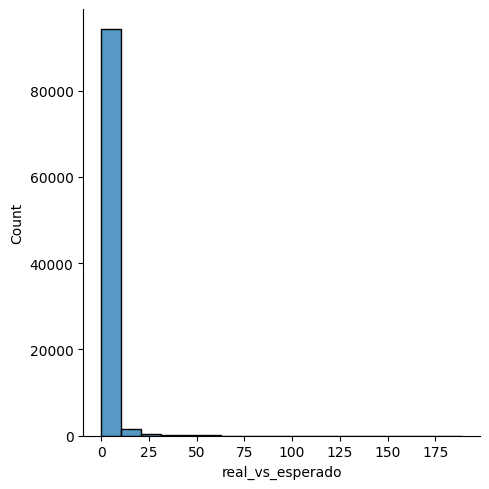

In [62]:
sns.displot(ordenes_entregadas['real_vs_esperado'])

___

### b) `puntaje_de_compra`
Retorna un dataframe con `order_id`, `es_cinco_estrellas`, `es_una_estrella`, `review_score`.

In [63]:
reviews = data['order_reviews'].copy()
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,...,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,...,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,...,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado. ...,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [64]:
reviews.columns

Index(['review_id                        ',
       'order_id                         ', 'review_score ',
       'review_comment_title      ',
       'review_comment_message                                                                                                                                                                                           ',
       'review_creation_date ', 'review_answer_timestamp'],
      dtype='object')

Me di cuenta que las columnas tienen espacios en blanco, por lo que importo la función de eliminación de espacios en blanco del archivo preprocess.py.

In [65]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(reviews)

In [66]:
from functions.preprocess import review_score   
reviews = review_score(reviews)
reviews.head()

,order_id,es_cinco_estrellas,es_una_estrella,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5


___

### c) `number_of_products`

Vamos a crear un dataframe que contenga las siguientes columnas: `order_id` y `number_of_products` (renombrada como `number_of_products_per_order`). 

In [67]:
from functions.preprocess import calcular_numero_de_productos
productos = calcular_numero_de_productos(data)
productos

,order_id,num_de_produc
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### d) `numero_de_vendedores`:
Retorna un dataframe con `order_id` y `numero_de_vendedores` (total de vendedores UNICOS !!! )

In [68]:
from functions.preprocess import vendedores_unicos
vendedores = vendedores_unicos(data)
vendedores

,order_id,vendedores_unicos
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


___

### e) `calcular_precio_y_transporte`
Retorna un dataframe con: `order_id`, `precio`, `valor_transporte`

In [69]:
from functions.preprocess import calcular_precio_y_transporte 
precio_y_transporte = calcular_precio_y_transporte(data)
precio_y_transporte

,order_id,precio,transporte
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


___

### f) `distancia_al_cliente`

Retorna un dataframe con `order_id` y `distancia_al_cliente` (distance in kilometers).

Para cumplir con este punto, utilizaré la función `haversine_distance` del archivo `preprocess.py` y los siguientes conjuntos de datos:

- `order_items`
- `sellers`
- `customers`

Hice una copia de ellos para evitar cualquier cambio en los conjuntos de datos originales.

In [70]:
order_items = data['order_items'].copy()
sellers = data['sellers'].copy()
buyers = data['customers'].copy()

In [71]:
from functions.preprocess import whitespace_remover_and_columns
sellers = whitespace_remover_and_columns(sellers)
order_items = whitespace_remover_and_columns(order_items)
buyers = whitespace_remover_and_columns(buyers)

Voy a importar el conjunto de datos de geolocalización. Debemos recordar que un mismo código postal puede tener diferentes latitudes y longitudes.

Para poder quedarme con el primero, voy a usar el método .first().



In [72]:
geo = data['geolocation'].copy()
geo = geo.groupby('geolocation_zip_code_prefix').first().reset_index()
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP
3,1004,-23.550116,-46.635122,sao paulo,SP
4,1005,-23.549819,-46.635606,sao paulo,SP


Voy a usar 'customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng' y hacer un merge entre vendedores y geolocation.

In [73]:
sellers_geo = sellers.merge(geo, how = 'left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
sellers_geo = sellers_geo[['seller_id', 'seller_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
sellers_geo.head()

,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,-22.382941,-46.946641
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,-22.971648,-46.533618


También voy a merger la geolocalización con los compradores, pero usando solo ['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'] de los compradores.


In [74]:
buyers_geo = buyers.merge(geo, how= 'left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
buyers_geo = buyers_geo[['customer_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
buyers_geo.head()

,customer_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,9790,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,1151,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,-22.987222,-47.151073


In [75]:
order_items_con_sellers = order_items.merge(sellers_geo,how='left',on='seller_id')
order_items_con_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,-22.931427,-53.133759


In [76]:
ordenes_entregadas_merges = ordenes_entregadas.copy()

In [77]:
order_items_con_sellers_con_orders = ordenes_entregadas_merges.merge(order_items_con_sellers, how='left',on='order_id')
order_items_con_sellers_con_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,real_vs_esperado,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,...,0.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,-23.680114,-46.452454
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,...,0.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,-19.810119,-43.984727
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,...,0.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,-21.362358,-48.232976
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,...,0.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,-19.840168,-43.923299
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,...,0.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,-23.551707,-46.260979


In [78]:
ordenes_entregadas_merges = order_items_con_sellers_con_orders.merge(buyers_geo,how='left',on='customer_id')
ordenes_entregadas_merges.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,-23.680114,-46.452454,3149,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,-19.810119,-43.984727,47813,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,-21.362358,-48.232976,75265,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,-19.840168,-43.923299,59296,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,-23.551707,-46.260979,9195,-23.675037,-46.524784


In [79]:
ordenes_entregadas_merges.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 15
order_delivered_carrier_date       2
order_delivered_customer_date      8
order_estimated_delivery_date      0
time_delta                         8
tiempo_de_espera                   8
tiempo_de_espera_pronosticado      0
real_vs_esperado                   0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
seller_zip_code_prefix             0
geolocation_lat_x                249
geolocation_lng_x                249
customer_zip_code_prefix           0
geolocation_lat_y                288
geolocation_lng_y                288
dtype: int64

He tomado la decisión de eliminar los valores NaN del conjunto de datos, ya que no van a ser útiles para el análisis.

In [80]:
order_items_con_ubicacion = ordenes_entregadas_merges.dropna()
order_items_con_ubicacion.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
time_delta                       0
tiempo_de_espera                 0
tiempo_de_espera_pronosticado    0
real_vs_esperado                 0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
geolocation_lat_x                0
geolocation_lng_x                0
customer_zip_code_prefix         0
geolocation_lat_y                0
geolocation_lng_y                0
dtype: int64

In [81]:
df_orders_geo_data = order_items_con_ubicacion.groupby('order_id').first().reset_index()
df_orders_geo_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.0,7.614421,...,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,-22.498183,-44.123614,28013,-21.758076,-41.312633
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,16.216181,...,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,-23.566258,-46.518417,15775,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.0,7.948437,...,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,-22.264094,-46.158564,35661,-19.860439,-44.597972
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,6.147269,...,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,-20.548228,-47.395897,12952,-23.144923,-46.539830
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,25.114352,...,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,-22.931427,-53.133759,13226,-23.249008,-46.824961


In [82]:
df_orders_geo_data.groupby('order_id').agg(
    amount_of_buyers = ('customer_id', 'count')
).mean()

amount_of_buyers    1.0
dtype: float64

In [83]:
from functions.preprocess import crear_columna
distancia_a_la_orden = crear_columna(df_orders_geo_data)
distancia_a_la_orden

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
95974,fffc94f6ce00a00581880bf54a75a037,2755.314485
95975,fffcd46ef2263f404302a634eb57f7eb,354.848852
95976,fffce4705a9662cd70adb13d4a31832d,338.827218
95977,fffe18544ffabc95dfada21779c9644f,72.870476





Mediana de la distancia entre vendedores y clientes

In [84]:
distancia_a_la_orden['distance_seller_customer'].describe()

count    95979.000000
mean       601.048658
std        595.734218
min          0.000000
25%        185.022663
50%        433.818215
75%        798.560107
max       8736.947618
Name: distance_seller_customer, dtype: float64

### Hago un merge de todos los dataframes excepto de `distance_to_customer`

In [85]:
buyers.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.
ordenes_entregadas.rename(columns=lambda x: x.strip(), inplace=True)
productos.rename(columns=lambda x: x.strip(), inplace=True)
vendedores.rename(columns=lambda x: x.strip(), inplace=True)
precio_y_transporte.rename(columns=lambda x: x.strip(), inplace=True)
distancia_a_la_orden.rename(columns=lambda x: x.strip(), inplace=True)


In [86]:
tablon_primario = ordenes_entregadas.merge(reviews, on='order_id') \
    .merge(productos, on='order_id') \
    .merge(vendedores, on='order_id') \
    .merge(precio_y_transporte, on='order_id')\
    .merge(distancia_a_la_orden, on='order_id')
tablon_primario

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,tiempo_de_espera,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,8.436574,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,13.782037,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,9.394213,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.208750,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,2.873877,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95852,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,8.218009,18.587442,0.0,1,0,5,1,1,72.00,13.08,69.481037
95853,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,22.193727,23.459051,0.0,0,0,4,1,1,174.90,20.10,474.098245
95854,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,24.859421,30.384225,0.0,1,0,5,1,1,205.99,65.02,968.051192
95855,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,17.086424,37.105243,0.0,0,0,2,2,1,359.98,81.18,370.146853


In [87]:
tablon_primario.to_csv("data/tablon_primario.csv")

## 2. Orders - Regresión Multivariada de `review_score`

In [88]:
orders = pd.read_csv("data/tablon_primario.csv")
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,0.0,0,0,4,1,1,29.99,8.72,18.063837
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,0.0,0,0,4,1,1,118.70,22.76,856.292580
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,0.0,1,0,5,1,1,159.90,19.22,514.130333
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,0.0,1,0,5,1,1,45.00,27.20,1822.800366
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,0.0,1,0,5,1,1,19.90,8.72,30.174037


Recordemos nuestro análisis simple de la parte anterior:

¿Con qué está correlacionado `review_score`?
- Si dos variables también tienen correlación entre sí, debemos analizarlas por separado.
- Intentemos con `statsmodels`: `waiting_time` y `real_vs_expected`.

In [89]:
from functions.preprocess import whitespace_remover_and_columns
orders = whitespace_remover_and_columns(orders)

<Axes: >

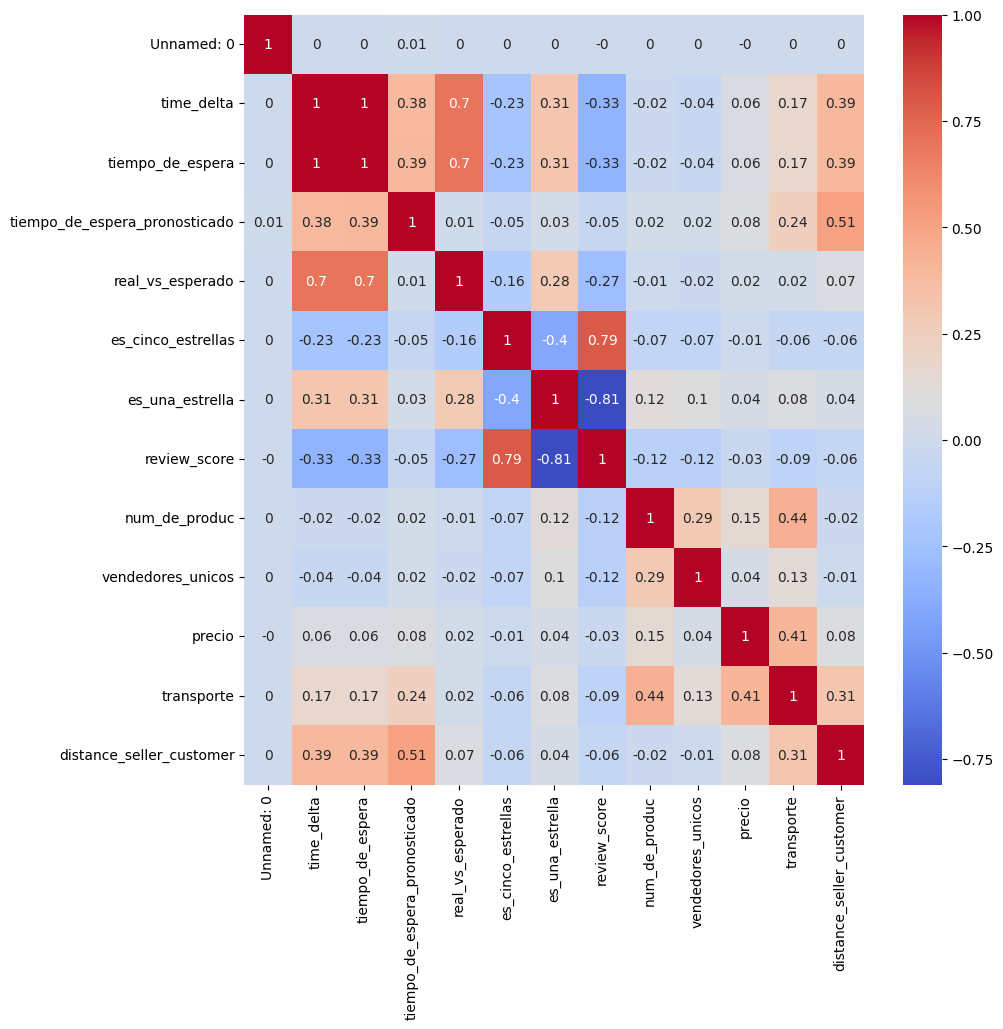

In [90]:
round(orders.corr(numeric_only=True),2)

plt.figure(figsize = (10, 10))

sns.heatmap(
    round(orders.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

He decidido hacer 4 modelos diferentes usando diferentes combinaciones de variables para ver cómo esta decisión afecta a los resultados.

## 1- Regresión Lineal Univariada

Voy a utilizar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`.
- `modelo1`: una regresión ols de `review_score` sobre `waiting_time`.
- `modelo2`: una regresión ols de `review_score` sobre `real_vs_expected`.

Para cada uno, imprimiré la tabla `summary` e interpretaré los resultados:
- Mostraré cómo estos resultados coinciden con el gráfico de seaborn.
- Interpretaré `R-cuadrado`, así como los coeficientes de regresión individuales, los `valores t`, los `valores p` y los `intervalos de confianza del 95 %`.

### ***Modelo 1:***

In [91]:
import statsmodels.formula.api as smf
modelo1 = smf.ols(formula='review_score ~ tiempo_de_espera', data=orders)
modelo1 = modelo1.fit()
print(modelo1.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:56   Log-Likelihood:            -1.5439e+05
No. Observations:               95857   AIC:                         3.088e+05
Df Residuals:                   95855   BIC:                         3.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

***→ R-squared*** = 0.112. Indica que solamente el 11.2% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (tiempo_de_espera). El otro 88.8% de la variación de la variable dependiente (review_score) es explicada por otras variables que no están incluidas en el modelo.

***→ Coeficientes de regresión individuales***. El coeficiente negativo de tiempo_de_espera indica que a medida que aumenta el tiempo_de_espera, el review_score tiende a disminuir. El coeficiente de tiempo_de_espera es -0.0454, lo que significa que por cada aumento de 1 en tiempo_de_espera, el review_score disminuye en 0.0454.
 
***→ Valores 't'***. El estadístico t (tomándolo en valor absoluto) para este coeficiente es muy grande. Es de -109.747, lo que indica que la estimación del coeficiente es altamente significativa. Un valor t grande significa que la relación entre la variable independiente (tiempo_de_espera) y la variable dependiente (review_score) es muy poco probable que sea debida al azar. Cuanto más grande sea el valor t, más fuerte es la evidencia en contra de la hipótesis nula (que el coeficiente es igual a cero)

***→ Valores 'p'***. El p-value para este coeficiente es muy pequeño (menor a 0.05). Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

***→ Intervalos de confianza del 95%***. Para este coeficiente el intervalo de confianza del 95% es de -0.046 a -0.045. No incluye cero, lo que apoya aún más la conclusión de que tiempo_de_espera tiene un efecto negativo significativo sobre review_score.

### ***Modelo 2:***

In [92]:
import statsmodels.formula.api as smf
modelo2 = smf.ols(formula='review_score ~ real_vs_esperado', data=orders)
modelo2 = modelo2.fit()
print(modelo2.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:56   Log-Likelihood:            -1.5637e+05
No. Observations:               95857   AIC:                         3.127e+05
Df Residuals:                   95855   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust  

***→ R-squared*** = 0.074. Indica que solamente el 7.4% de la variación de la variable dependiente (review_score) es explicada por la variable independiente (real_vs_esperado). El otro 92.6% de la variación de la variable dependiente (real_vs_esperado) es explicada por otras variables que no están incluidas en el modelo.

***→ Coeficientes de regresión individuales***. El coeficiente negativo de real_vs_esperado indica que a medida que aumenta el tiempo real_vs_esperado, el review_score tiende a disminuir. El coeficiente de real_vs_esperado es -0.0752, lo que significa que por cada aumento de 1 en real_vs_esperado, el review_score disminuye en 0.0752.
 
***→ Valores 't'***. El estadístico t (tomándolo en valor absoluto) para este coeficiente es muy grande. Es de -87.644, lo que indica que la estimación del coeficiente es altamente significativa. Un valor t grande significa que la relación entre la variable independiente (real_vs_esperado) y la variable dependiente (review_score) es muy poco probable que sea debida al azar. Cuanto más grande sea el valor t, más fuerte es la evidencia en contra de la hipótesis nula (que el coeficiente es igual a cero)

***→ Valores 'p'***. El p-value para este coeficiente es muy pequeño (menor a 0.05). Es de 0.000, lo que indica que la probabilidad de observar una estadísica t tan grande por casualidad es muy baja.

***→ Intervalos de confianza del 95%***. Para este coeficiente el intervalo de confianza del 95% es de -0.077 a -0.073. No incluye cero, lo que apoya aún más la conclusión de que real_vs_esperado tiene un efecto negativo significativo sobre review_score.

## 2- Regresión Lineal Multivariada

### ***Modelo 3:***

In [93]:
modelo3= smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado', data=orders)
modelo3 = modelo3.fit()
print(modelo3.summary())
coef_real_vs_esperado = modelo3.params['real_vs_esperado']
print(f"El impacto en review_score de agregar un día más de real_vs_esperado es {coef_real_vs_esperado:.4f}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6193.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:56   Log-Likelihood:            -1.5424e+05
No. Observations:               95857   AIC:                         3.085e+05
Df Residuals:                   95854   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [94]:
print(f"El coeficiente para tiempo_de_espera es {modelo3.params['tiempo_de_espera']:.4f}")
print(f"El coeficiente para real_vs_esperado es {modelo3.params['real_vs_esperado']:.4f}")

El coeficiente para tiempo_de_espera es -0.0383
El coeficiente para real_vs_esperado es -0.0205


También decidí ver qué sucede con `review_score` si se agrega un día adicional a `real_vs_expected`, manteniendo todo lo demás constante.

El impacto en `review_score` de agregar un día más a `real_vs_expected`, manteniendo todo lo demás constante, es de -0.0205. En otras palabras, por cada aumento de 1 en `real_vs_expected`, `review_score` disminuye en 0.0205.

Además, decidí observar qué variable es más explicativa para `review_score` entre `waiting_time` y `real_vs_expected`. Para determinar esto, se deben comparar los coeficientes. Dado que `waiting_time` tiene un coeficiente más alto, es más explicativo para `review_score` que `real_vs_expected`.

Nuestra regresión multivariante nos permite aislar el impacto de una característica mientras controla el efecto de otras características. Estos nuevos coeficientes se llaman **`coeficientes de correlación parcial`**.

Finalmente, el R-cuadrado de la regresión multivariante es 0.112. Esto significa que no más del 12% de las variaciones en `review_score` pueden explicarse por las variaciones en `waiting_time` y `real_vs_expected`.

Ahora, crearé un nuevo modelo OLS `model4` con más características del conjunto de datos `orders` para mejorar el poder explicativo del modelo.

Notas:
- No voy a agregar dos características que sean perfectamente colineales.
- Voy a transformar cada variable $X_i$ con el z-score respectivo $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ para comparar los coeficientes de regresión parcial $\beta_i$ en la misma escala. $\beta_i$ no estará en la misma dimensión.

### ***Modelo 4:***

In [95]:
features = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']

In [96]:
from scipy.stats import zscore

columns_para_transformar = ['tiempo_de_espera', 'real_vs_esperado', 'num_de_produc', 'vendedores_unicos', 'precio', 'transporte', 'distance_seller_customer']
orders_zscore = orders[columns_para_transformar].apply(zscore)
orders[columns_para_transformar] = orders_zscore
orders.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_delta,...,tiempo_de_espera_pronosticado,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,num_de_produc,vendedores_unicos,precio,transporte,distance_seller_customer
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,...,15.544063,-0.161781,0,0,4,-0.264603,-0.112554,-0.513784,-0.652018,-0.978986
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,...,19.137766,-0.161781,0,0,4,-0.264603,-0.112554,-0.086646,0.000447,0.429687
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,...,26.639711,-0.161781,1,0,5,-0.264603,-0.112554,0.111732,-0.164063,-0.145329
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,...,26.188819,-0.161781,1,0,5,-0.264603,-0.112554,-0.441511,0.206782,2.053937
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,...,12.112049,-0.161781,1,0,5,-0.264603,-0.112554,-0.562367,-0.652018,-0.958634


In [97]:
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ tiempo_de_espera + real_vs_esperado + num_de_produc + vendedores_unicos + precio + transporte + distance_seller_customer'

In [98]:
modelo4 = smf.ols(formula=formula, data=orders)
modelo4 = modelo4.fit()
print(modelo4.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:56   Log-Likelihood:            -1.5255e+05
No. Observations:               95857   AIC:                         3.051e+05
Df Residuals:                   95849   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust  

### Caraacterísticas más importantes del modelo:

<Axes: >

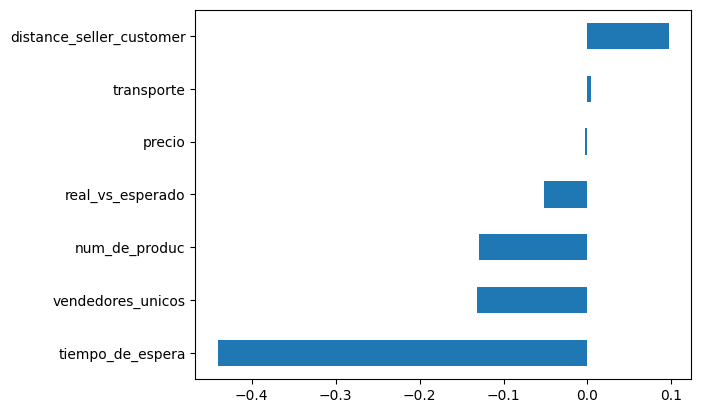

In [99]:
modelo4.params[1:].sort_values().plot(kind='barh')

Después de haber agregado más características al modelo e imprimir el resumen, he decidido responder algunas preguntas sobre este nuevo modelo.

### ¿Cómo ha cambiado el rendimiento general de la regresión?

El rendimiento general de la regresión se puede evaluar a través del valor R-squared. En este caso, el valor R-squared aumentó de 0.114 a 0.145 (del modelo3 al modelo4), lo que indica que el modelo 4 explica un poco más la variación de la variable dependiente (review_score) que el modelo 3.

Lo que sucede aquí es que el 14.5% de la variación en review_score se puede explicar por las variaciones combinadas en tiempo_de_espera, real_vs_esperado, distancia, freight_value, precio y volumen. El otro 85.5% de la variación en review_score se puede explicar por otras variables que no están incluidas en el modelo.

### ¿Es esta regresión estadísticamente significativa?

Para determinar si una regresión es estadísticamente significativa debemos mirar Prob (F-statistic). En este caso, el valor de Prob (F-statistic) es 0.000, lo que indica que el modelo es estadísticamente significativo. Si el modelo no fuera estadísticamente significativo, no podríamos confiar en los resultados de los coeficientes individuales.

### ¿Cual es la variable que más impacto tiene?

Para ver cual es la variable que más impacto tiene, debemos hacer foco en los coeficientes de regresión individuales. En este caso, la variable que más impacto tiene sobre review_score es tiempo_de_espera, ya que tiene el coeficiente (en términos absolutos) más alto. El mismo es de -0.04401, lo que significa que por cada aumento de 1 en tiempo_de_espera, el review_score disminuye en 0.4401.

### ¿Qué pasa con productos y vendedores cuando hay más?

Para analizar qué es lo que ocurre con productos y vendedores cuando hay más, también debemos observar los coeficientes de regresión individuales (en este caso de num_de_produc y vendedores_unicos). Como ambos coeficientes son negativos, eso significa que a medida que el número de productos o vendedores aumenta, el review_score decrece.

El coeficiente de num_de_produc es de -0.1297, lo que significa que por cada aumento de 1 en num_de_produc, el review_score disminuye en 0.1297. El coeficiente de vendedores_unicos es de -0.1313, lo que significa que por cada aumento de 1 en vendedores_unicos, el review_score disminuye en 0.1313.


### ¿Qué pasa con la distancia?

Para analizar qué es lo que ocurre con la distancia_seller_customer, también debemos observar el coeficiente de regresión individual. Como el coeficiente es positivo, eso significa que a medida que la distancia aumenta, el review_score aumenta. El coeficiente de distancia_seller_customer es de 0.0970, lo que significa que por cada aumento de 1 en distancia_seller_customer, el review_score aumenta en 0.0970.

### ¿Qué pasa con precio y transporte?

Para analizar qué es lo que ocurre con precio y transporte, también debemos observar los coeficientes de regresión individuales (en este caso de precio y freight_value). Como ambos coeficientes tienen signos opuestos, eso significa que a medida que el precio aumenta, el review_score disminuye, mientras que a medida que el freight_value aumenta, el review_score aumenta.

El coeficiente de precio es de -0.0029, lo que significa que por cada aumento de 1 en precio, el review_score disminuye en 0.0029. En cambio, El coeficiente de freight_value es de 0.0043, lo que significa que por cada aumento de 1 en freight_value, el review_score aumenta en 0.0043.



### ¿Qué pasa con F-statistics y p-value?

El valor de F-statistic mide la significancia general del modelo de regresión. Un valor alto de F-statistic indica que el modelo es estadísticamente significativo, lo que significa que al menos una de las variables independientes está relacionada con la variable dependiente. En este caso, el valor de F-statistic es 2323, lo que indica que el modelo de regresión es estadísticamente significativo.


El P>|t| (p-value) es una medida de la significancia estadística de cada variable independiente en el modelo de regresión. Un valor alto de P>|t| (mayor a 0.05) indica que la variable independiente no es estadísticamente significativa en la predicción de la variable dependiente.

Por un lado, el P>|t| de precio es 0.489 y el de transporte es 0.385, lo que significa que estas variables no son estadísticamente significativas en la predicción de la variable dependiente (review_score) ya que sus valores de p son mayores a 0.05. Esto sugiere que el precio y el costo de transporte no tienen un impacto significativo en la calificación de revisión.

Por el otro, el P>|t| del resto de las variables es 0.00 (menor a 0.05), lo que significa que son estadísticamente significativas en la predicción de la variable dependiente (review_score). Esto sugiere que el tiempo de espera, el tiempo real vs esperado, la distancia, el número de productos y el número de vendedores tienen un impacto significativo en el review_score.

### Analizar R cuadrado

El valor R-cuadrado es una medida de la bondad de ajuste del modelo de regresión. Indica la proporción de la variación total de la variable dependiente que es explicada por el modelo. En este caso, el valor R-cuadrado es de 0.145, lo que significa que el modelo explica el 14.5% de la variación total de la variable dependiente (review_score).

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.

Un valor R-cuadrado bajo indica que el modelo no explica bien la variación de la variable dependiente y que puede haber otras variables importantes que no se están considerando en el modelo. 

Sin embargo, es importante tener en cuenta que un valor R-cuadrado alto no garantiza que el modelo sea bueno, ya que puede haber otras variables que afecten la variable dependiente y que no se estén considerando en el modelo. Por lo tanto, es importante evaluar otros aspectos del modelo, como los coeficientes de regresión individuales y los valores p, para determinar si el modelo es adecuado para los datos.


## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre tenemos que visualizar la distribución de las predicciones, y especialmente los residuales.

* Es por eso que voy a calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [100]:
n = len(modelo4.resid)
residuos = modelo4.predict() - orders['review_score']
residuos = modelo4.predict() - orders['review_score']


In [101]:
residuos = residuos.std() / orders['review_score'].std() * 1 / (n ** 0.5)
residuos

0.002986507654213605

### Computar RMSE

In [102]:
from sklearn.metrics import mean_squared_error

y_true = orders['review_score']
y_pred = modelo4.predict()

rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"The RMSE is {rmse:.4f}")

The RMSE is 1.1883


### Graficando los resultados

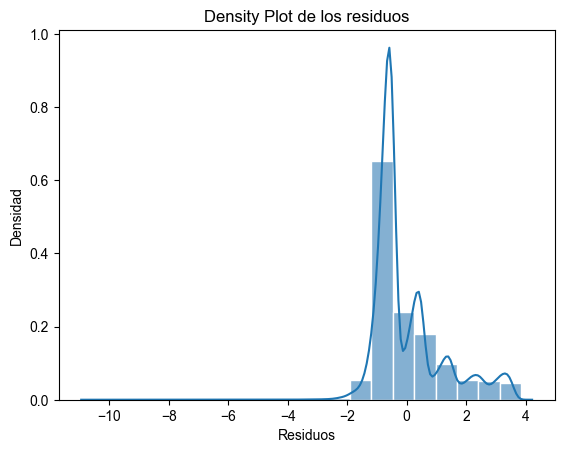

In [103]:
residuos = modelo4.predict() - orders['review_score']

sns.kdeplot(residuos, shade=False)
sns.set_style("darkgrid")
plt.hist(residuos, bins=20, density=True, color = '#84B0D2')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Density Plot de los residuos')
plt.show()

Hubo una pregunta que surgió al analizar la forma del Gráfico de Densidad de Residuos.

### ¿Por qué el gráfico de residuos tiene una forma tan extraña?

El gráfico de residuos puede tener una forma extraña si el modelo de regresión no se ajusta bien a los datos. Esto puede deberse a que el modelo no tiene en cuenta todas las variables importantes que afectan a la variable dependiente (b1), o porque el modelo no es lo suficientemente flexible para capturar la complejidad entre las variables independientes (b0) y la variable dependiente (b1).

Decidí trazar en el mismo gráfico el `review_score` y el `predicted_review_score` para ver cómo se ajusta el modelo a los datos.

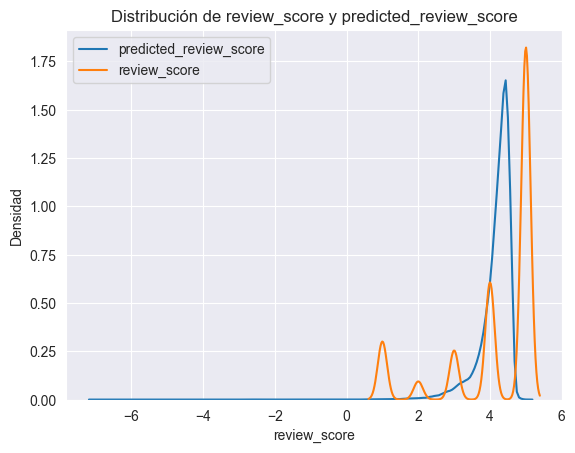

In [104]:
review_score = orders['review_score']
predicted_review_score = modelo4.predict()

sns.kdeplot(predicted_review_score, shade=False, label='predicted_review_score')
sns.kdeplot(review_score, shade=False, label='review_score')
sns.set_style("darkgrid")
plt.xlabel('review_score')
plt.ylabel('Densidad')
plt.title('Distribución de review_score y predicted_review_score')
plt.legend()
plt.show()

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Voy a hacerlo con una `sub-muestra` de la población, y una vez con la `toda la población`.

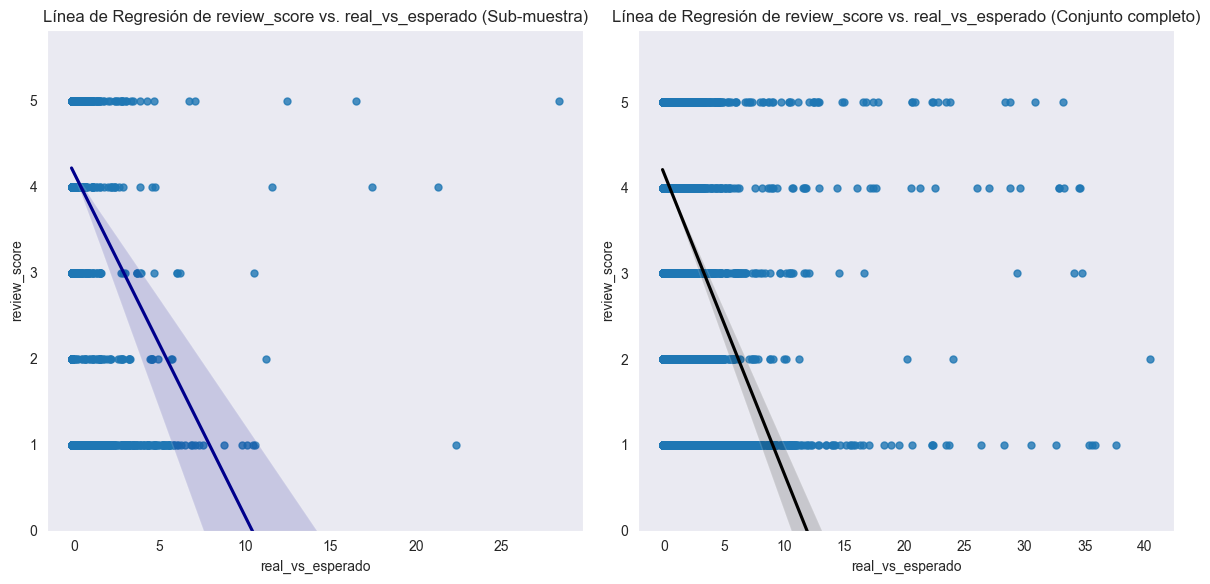

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subset
sub_muestra = orders.sample(n=9000, random_state=42)
sns.set(style="darkgrid")
plot1 = sns.regplot(x="real_vs_esperado", y="review_score", data=sub_muestra, ci=95, scatter_kws={"s": 25}, line_kws={"color": "darkblue"}, ax=axes[0])
plot1.set(ylim=(0, None))
axes[0].set_title("Línea de Regresión de review_score vs. real_vs_esperado (Sub-muestra)")
axes[0].grid(False)

# Toda la población
sns.set(style="darkgrid")
plot2 = sns.regplot(x="real_vs_esperado", y="review_score", data=orders, ci=95, scatter_kws={"s": 25}, line_kws={"color": "black"}, ax=axes[1])
plot2.set(ylim=(0, None))
axes[1].set_title("Línea de Regresión de review_score vs. real_vs_esperado (Conjunto completo)")
axes[1].grid(False)

plt.tight_layout()
plt.show()
